## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)

In [32]:
gs = pd.read_excel('/Users/gracesaunders/Documents/GitHub/EDA2/lab/GSS.xlsx')

3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

<Axes: xlabel='year'>

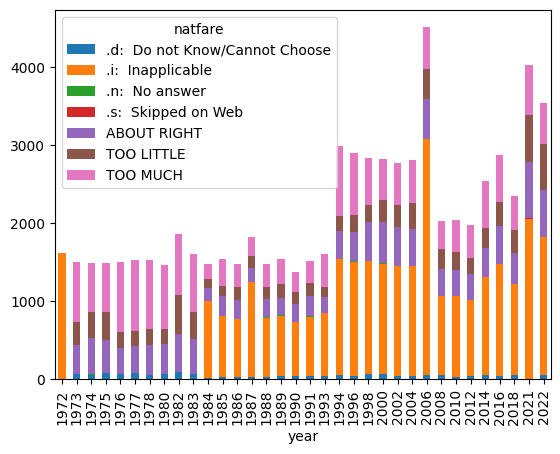

In [33]:
# examination in data wrangler showed that the data was already very consistent and needed 
# little cleaning.

# however, I did notice that many columns had about 43% .i (inapplicable) values, so I tried to
# figure out which years had the most missing values with some preliminary plots
var = 'natfare'
pd.crosstab(gs['year'], gs[var]).plot(kind='bar', stacked=True)

In [34]:
# found that 1972 was entirely missing, so I dropped it
gs = gs[gs['year'] != 1972]

# starting in 1984, they started introducing different versions of the question wordings, so for
# consistency and relevance, I dropped all years before 1984
gs = gs[gs['year'] >= 1984]

# therefore, this data is not fully complete, since I believe that the .i values indicate that those respondents were asked a different version of the 
# questions (ie natfare vs natfarey vs natfarex)

In [35]:
# I considered dropping years with particularly high proportions of inapplicable values, but decided to keep
# them since they were not consecutive and I didn't want to lose too much power to analyse change over time
is_i = gs == '.i:  Inapplicable'
percentage_i_by_year = is_i.groupby(gs['year']).mean() * 100
high_i = percentage_i_by_year[percentage_i_by_year > 60]
print(high_i)
# This table shows how the data is useful nonetheless because .i is consistent across all selected columns for a given year, 
# suggesting that while the question versions varied, each individual respondent was asked a single series of questions
#  for this category of spending opinion data

      year  id_  partyid    natspac   natenvir    natheal   natcrime  \
year                                                                   
1984   NaN  NaN      NaN  66.734555  66.734555  66.734555  66.734555   
1985   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1986   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1987   NaN  NaN      NaN  66.849918  66.849918  66.849918  66.849918   
1988   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1989   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1990   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1991   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1993   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1994   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1996   NaN  NaN      NaN        NaN        NaN        NaN        NaN   
1998   NaN  NaN      NaN        NaN        NaN        NaN       

In [38]:
# I decided to leave the .i/.n/.s values and simply create a new column for missing? (Y/N)
missing_codes = ['.i:  Inapplicable', '.n: No answer', '.s: Skipped on Web'] 
# .d not included here because it isn't strictly missing ("don't know" is also an opinion)

# N if none of the columns are missing, otherwise Y
gs['missing?'] = np.where(gs.isin(missing_codes).any(axis=1), 'Y', 'N') 
pd.crosstab(gs['year'], gs['missing?'])

missing?,N,Y
year,,
1984,0,1473
1985,0,1534
1986,0,1470
1987,0,1819
1988,0,1481
1989,0,1537
1990,0,1372
1991,0,1517
1993,0,1606


In [40]:
#from the table above, we can see that until 2002, each row has at least one missing value, so I will drop those years to focus 
# only on the most recent & complete data
nm = gs[gs['missing?'] == 'N']
# now the remaining data for analysis is a subset of the original where all columns have a response, and the year is 2002 or later
# this obviously reduces the sample size, but I think it's worth it to have a more complete dataset for analysis of change over time

4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

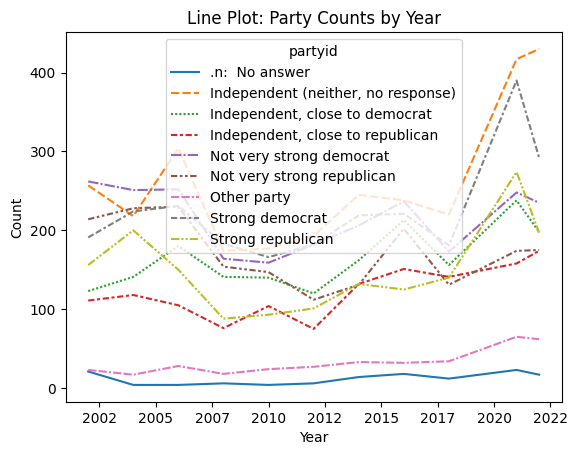

In [53]:
# get counts for each party by year
from matplotlib import ticker


party_year = nm.groupby(['year', 'partyid']).size().reset_index(name='count')

# create line plot
p1 = sns.lineplot(data=party_year, x='year', y='count', hue='partyid', style='partyid')

# add labels/title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot: Party Counts by Year')
p1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x)))


# Show the plot
plt.show()

/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_4702/4167193115.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm['simp_party'] = nm['partyid'].map(party_mapping)


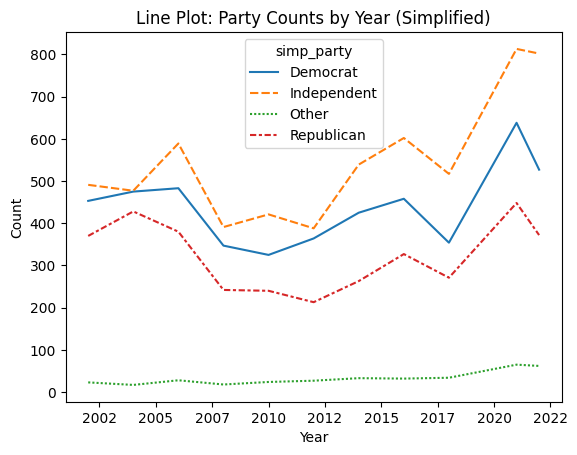

In [59]:
# the plot above has more nuance but it's busy and hard to read, so I will make a simplified party column 
party_mapping = {
    '.n: No answer': 'No answer',
    '.d: Do not know/Cannot Choose': 'No answer',
    'Independent (neither, no response)': 'Independent',
    'Independent, close to democrat': 'Independent',
    'Independent, close to republican': 'Independent',
    'Strong democrat': 'Democrat',
    'Not very strong democrat': 'Democrat',
    'Strong republican': 'Republican',
    'Not very strong republican': 'Republican',
    'Other party': 'Other'
}

nm['simp_party'] = nm['partyid'].map(party_mapping)

# get counts for each party by year
sparty_year = nm.groupby(['year', 'simp_party']).size().reset_index(name='count')

# create line plot
p2 = sns.lineplot(data=sparty_year, x='year', y='count', hue='simp_party', style='simp_party')

# add labels/title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot: Party Counts by Year (Simplified)')
p2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x)))


# Show the plot
plt.show()

In [60]:
# overall, while the plot above shows a higher count of democrats than republicans, the trends over time are similar for both parties, 
# and the proportion seems overall stable. However, it is noticeable that the number of independents has increased over time, while # of democrats and 
# republicans in 2022 are not significantly different from 2002.
# to confirm: 
print("Net change in # of Democrats: ", sparty_year[sparty_year['simp_party'] == 'Democrat']['count'].iloc[-1] - sparty_year[sparty_year['simp_party'] == 'Democrat']['count'].iloc[0])
print("Net change in # of Republicans: ", sparty_year[sparty_year['simp_party'] == 'Republican']['count'].iloc[-1] - sparty_year[sparty_year['simp_party'] == 'Republican']['count'].iloc[0])
print("Net change in # of Independents: ", sparty_year[sparty_year['simp_party'] == 'Independent']['count'].iloc[-1] - sparty_year[sparty_year['simp_party'] == 'Independent']['count'].iloc[0])

Net change in # of Democrats:  74
Net change in # of Republicans:  2
Net change in # of Independents:  311


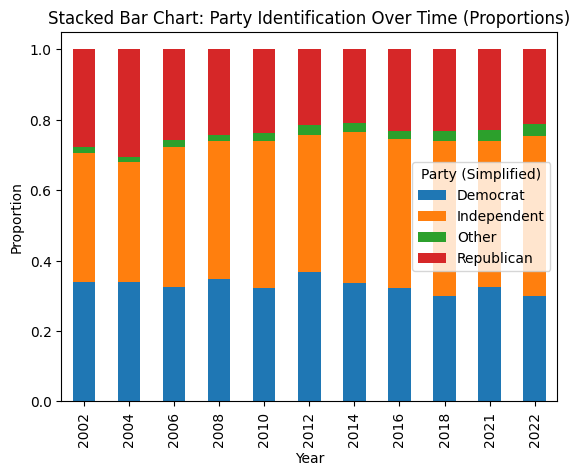

In [61]:
# Group by year and simp_party, then calculate counts
sparty_year
pivot_spy = sparty_year.pivot(index='year', columns='simp_party', values='count')
pivot_spy = pivot_spy.div(pivot_spy.sum(axis=1), axis=0)

# Create the stacked bar chart with proportions
pivot_spy.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Stacked Bar Chart: Party Identification Over Time (Proportions)')

# Show the legend
plt.legend(title='Party (Simplified)')

# Show the plot
plt.show()

/var/folders/rs/40ldjcbs0ks2l9sptdb8835c0000gn/T/ipykernel_4702/4232510413.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm['partystrength'] = nm['partyid'].map(strength_mapping)


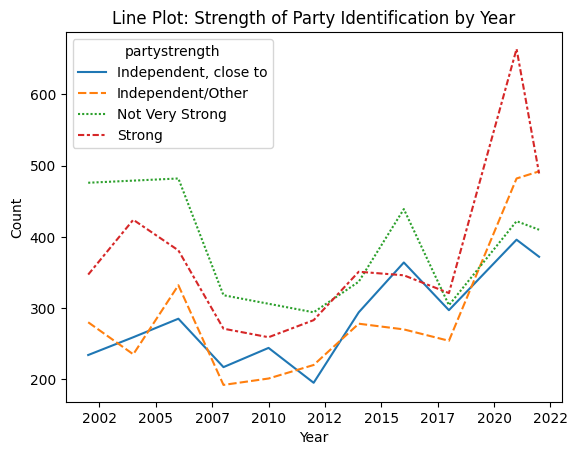

In [64]:
# Especially by comparing 2002 vs 2022, we can see that the proportion of independent/other party respondents has increased over time, 
# while the proportions of democrats and republicans have both decreased. Now I'm curious how strength of party identification has changed. 
# the plot above has more nuance but it's busy and hard to read, so I will make a simplified party column 

strength_mapping = {
    '.n: No answer': 'No Answer',
    '.d: Do not know/Cannot Choose': 'No Answer',
    'Independent (neither, no response)': 'Independent/Other',
    'Independent, close to democrat': 'Independent, close to',
    'Independent, close to republican': 'Independent, close to',
    'Strong democrat': 'Strong',
    'Not very strong democrat': 'Not Very Strong',
    'Strong republican': 'Strong',
    'Not very strong republican': 'Not Very Strong',
    'Other party': 'Independent/Other'
}

nm['partystrength'] = nm['partyid'].map(strength_mapping)

# get counts for each party by year
pstrength_year = nm.groupby(['year', 'partystrength']).size().reset_index(name='count')

# create line plot
p3 = sns.lineplot(data=pstrength_year, x='year', y='count', hue='partystrength', style='partystrength')

# add labels/title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot: Strength of Party Identification by Year')
p3.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x)))


# Show the plot
plt.show()

In [ ]:
# The plot above shows much more variation than party ID. Here we can see that Strong party ID peaked in 2020/2021 (related to election year?),
# then dropped sharply the following year (related to election results?). Not Very Strong party ID has been generally decreasing over time, 
# while Independent/Other and Independent, close to have been increasing overall. This corroborates the previously identified trend of increasing 
# independent identification over time.